# Imports

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import (cross_val_score, GridSearchCV)
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             classification_report)

In [93]:
X_train = pd.read_csv('../data/x_train_ss_processed.csv')
X_test = pd.read_csv('../data/x_test_ss_processed.csv')
y_train = pd.read_csv('../data/y_train_processed.csv')
y_test = pd.read_csv('../data/y_test_processed.csv')

In [95]:
print(X_train.shape, '\n', 
      y_train.shape, '\n', 
      X_test.shape, '\n', 
      y_test.shape)

(17696, 25) 
 (17696, 1) 
 (4425, 25) 
 (4425, 1)


# Logistic Regression Model

In [111]:
logreg_params = {'penalty': ['l1', 'l2'], 
                 'solver': ['liblinear', 'saga'],
                }

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 logreg_params, 
                                 cv=5, 
                                 n_jobs=-1)

logreg_gridsearch.fit(X_train, y_train.values.ravel())

print(logreg_gridsearch.best_estimator_)
print(logreg_gridsearch.best_params_)

print('Baseline: 67%')

print('\nBest Score:', round(logreg_gridsearch.best_score_, 4))
print('Test Score:', round(logreg_gridsearch.score(X_test, y_test.values.ravel()), 4))

LogisticRegression(penalty='l1', solver='saga')
{'penalty': 'l1', 'solver': 'saga'}
Baseline: 67%

Best Score: 0.7743
Test Score: 0.7831


In [110]:
logreg = LogisticRegression(max_iter=50000, 
                            penalty='l1', 
                            random_state=73, 
                            solver='liblinear')

logreg.fit(X_train, y_train.values.ravel())

train_scores = cross_val_score(logreg, X_train, y_train.values.ravel())
test_scores = cross_val_score(logreg, X_test, y_test.values.ravel())

print('Baseline: 67%\n')

print('Train scores:', train_scores)
print('Mean:', round(train_scores.mean(), 3))
print('Stdev:', round(2 * train_scores.std(), 3), '\n')

print('Test scores:', test_scores)
print('Mean:', round(test_scores.mean(), 3))
print('Stdev:', round(2 * test_scores.std(), 3), '\n')

Baseline: 67%

Train scores: [0.77372881 0.76264481 0.7660356  0.77394744 0.77366488]
Mean: 0.77
Stdev: 0.009 

Test scores: [0.79096045 0.76384181 0.78870056 0.76836158 0.76949153]
Mean: 0.776
Stdev: 0.023 



# Coefficient Interpretation

In [127]:
logreg_coefs = pd.DataFrame(zip(X_train.columns, 
                                     np.expm1(logreg.coef_[0]), 
                                     np.expm1(logreg.coef_[1]))), 
                           columns=['features', 'coef_0', 'cpef_1'])

# logreg_coefs['abs'] = abs(logreg_coefs['coef'])

# logreg_coefs.sort_values('abs', ascending=False)

logreg_coefs

,features,coef_0,cpef_1
0,cause_recoded_ord,-0.234720,0.103802
1,sci_consensus_ord,-0.260121,-0.414933
2,harm_personally_ord,-0.244709,-0.017020
3,harm_US_ord,-0.107500,0.061613
4,harm_dev_countries_ord,-0.032473,0.036041
5,harm_future_gen_ord,0.002882,0.054721
6,harm_plants_animals_ord,-0.156018,0.044965
7,when_harm_US_ord,-0.600291,-0.208962
8,educ_category_ord,-0.008901,-0.105184
9,reg_CO2_pollutant_ord,-0.182325,-0.020420


In [124]:
logreg_coefs = pd.DataFrame(list(zip(X_train.columns, np.expm1(logreg.coef_[2]))), 
                           columns=['features', 'coef'])

logreg_coefs['abs'] = abs(logreg_coefs['coef'])

logreg_coefs.sort_values('abs', ascending=False)

,features,coef,abs
7,when_harm_US_ord,1.096166,1.096166
1,sci_consensus_ord,1.011463,1.011463
0,cause_recoded_ord,0.742590,0.742590
14,party_x_ideo_Liberal Democrat,0.593427,0.593427
15,party_x_ideo_Moderate/Conservative Democrat,0.337257,0.337257
6,harm_plants_animals_ord,0.271066,0.271066
11,discuss_GW_ord,0.260029,0.260029
9,reg_CO2_pollutant_ord,0.196040,0.196040
10,fund_research_ord,0.170612,0.170612
2,harm_personally_ord,0.127021,0.127021


# Metrics

              precision    recall  f1-score   support

          No       0.70      0.68      0.69       722
  Don't know       0.53      0.20      0.29       719
         Yes       0.82      0.95      0.88      2984

    accuracy                           0.78      4425
   macro avg       0.68      0.61      0.62      4425
weighted avg       0.75      0.78      0.75      4425



''

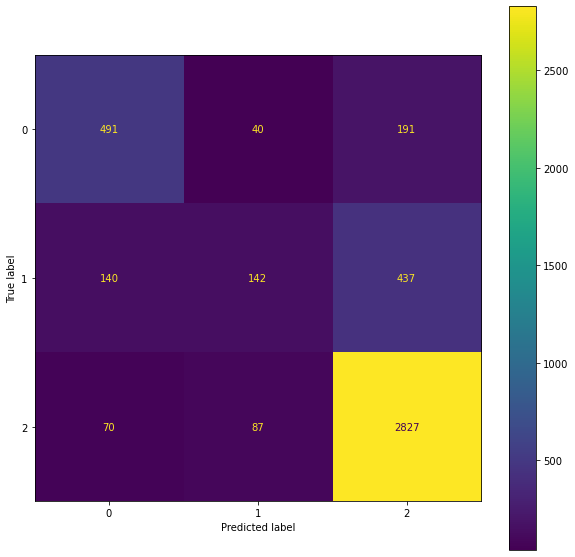

In [121]:
conmat = np.array(confusion_matrix(y_test, 
                                   logreg.predict(X_test), 
                                   labels=[0, 1, 2]))

print(classification_report(y_test,
                            logreg.predict(X_test), 
                            target_names=['No', "Don't know", 'Yes']))

matrix_display = ConfusionMatrixDisplay(confusion_matrix=conmat, 
                                        display_labels=logreg.classes_)
matrix_display.plot()

figure = plt.gcf()
figure.set_size_inches(10, 10)
;